**PORTFOLIO ALLOCATION USING SAMPLE ESTIMATES vs FAMA FRENCH 3 FACTOR ESTIMATES**

returns on the asset are assumed to be stationary, then we can take a time series of past returns and use the sample mean and standard deviation these are used as an estimate for E(R) and σR.

In [ ]:
#Importing Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axis import Axis

#Importing the Fama French Factor data and extracting the factors from 2017-01-03 to 2018-12-31
ff_factors = pd.read_csv('/content/F-F_Research_Data_Factors_daily.CSV', skiprows = 3,)
ff_factors = ff_factors.rename(columns={"Unnamed: 0": "Date"})
ff_factors = ff_factors.iloc[23889:24391]
ff_factors["Date"]= pd.to_datetime(ff_factors["Date"])
ff_factors.set_index('Date', inplace=True)
print(ff_factors.head())

            Mkt-RF   SMB   HML     RF
Date                                 
2017-01-03    0.83 -0.14  0.06  0.002
2017-01-04    0.79  0.95 -0.16  0.002
2017-01-05   -0.21 -0.89 -0.79  0.002
2017-01-06    0.29 -0.66 -0.31  0.002
2017-01-09   -0.37 -0.30 -1.03  0.002


In [ ]:
#importing the Yahoo Finance API and then getting the data for three stocks namely GE, IBM and MSFT.
import yfinance as yf
data = yf.download("GE IBM MSFT", start = "2017-01-01", end = "2019-01-01")

[*********************100%%**********************]  3 of 3 completed


In [ ]:
#getting the adjusted close price for each stock and finding the return series on each stock.
Portfolio = data["Adj Close"]
print(Portfolio.head())
Portfolio_returns = Portfolio.pct_change()
Portfolio_returns = Portfolio_returns.dropna()
print(Portfolio_returns.head())

                    GE         IBM       MSFT
Date                                         
2017-01-03  175.663834  116.654449  57.254711
2017-01-04  175.719269  118.098755  56.998516
2017-01-05  174.721512  117.708015  56.998516
2017-01-06  175.220398  118.287117  57.492573
2017-01-09  174.388947  116.975380  57.309589
                  GE       IBM      MSFT
Date                                    
2017-01-04  0.000316  0.012381 -0.004475
2017-01-05 -0.005678 -0.003309  0.000000
2017-01-06  0.002855  0.004920  0.008668
2017-01-09 -0.004745 -0.011089 -0.003183
2017-01-10 -0.002861 -0.012705 -0.000319


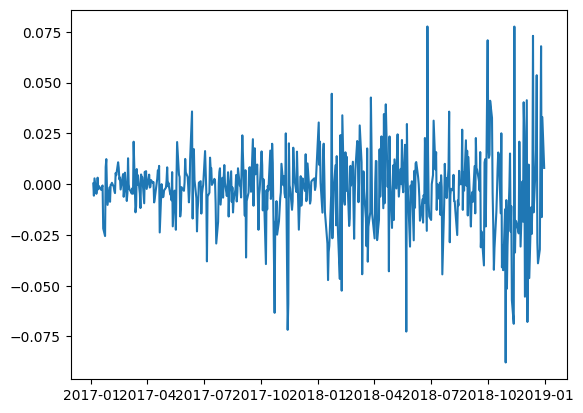

In [ ]:
# Plotting GE Return Series
plt.plot(Portfolio_returns.index, Portfolio_returns.GE)

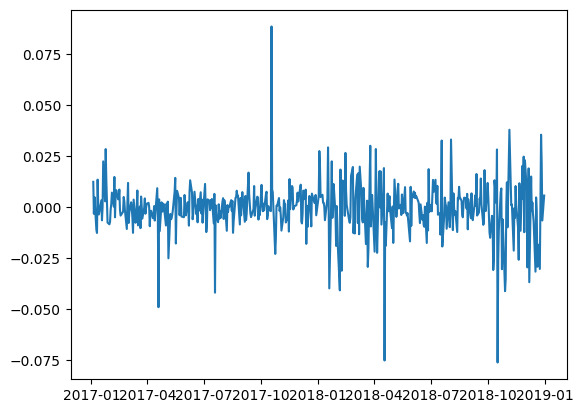

In [ ]:
# Plotting IBM Return Series
plt.plot(Portfolio_returns.index, Portfolio_returns.IBM)

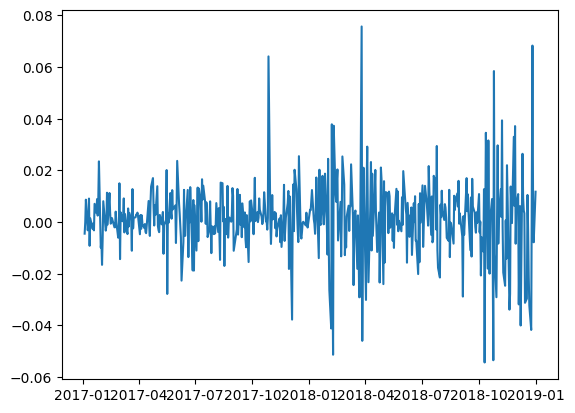

In [ ]:
# Plotting MSFT Return Series
plt.plot(Portfolio_returns.index, Portfolio_returns.MSFT)

In [ ]:
# Merging all the necessary data into a data frame.
Data_set = Portfolio_returns.merge(ff_factors, on = "Date")
print(Data_set.tail())

                  GE       IBM      MSFT  Mkt-RF   SMB   HML     RF
Date                                                               
2018-12-24 -0.032168 -0.030377 -0.041739   -2.55  1.00 -0.48  0.011
2018-12-26  0.067919  0.035512  0.068310    5.06 -0.06 -1.02  0.011
2018-12-27 -0.016238  0.021456  0.006165    0.78 -0.66 -0.12  0.011
2018-12-28  0.033012 -0.006592 -0.007808   -0.03  0.77  0.26  0.011
2018-12-31  0.007989  0.005662  0.011754    0.90 -0.10 -0.46  0.011


Assume that we have N risky assets and that the return on the ith risky
asset is Ri and has expected value μi. Define *R* = (R1, R2, ... , Rn)^T to be the random vector of returns.

E(*R*) = *u* = (u1, u2, ... , un)^T

*w* = (w1, w2, ... , wn)^T

Σ to be the covariance matrix of R.

expected return on portfolio is
        Σ wiui = (*w*^T)*u*

The variance of the return on the portfolio with weights w is
(w^T)Σ(w) = σ2

simulating w to get different expected returns and variance for each simulated portfolio.


In [ ]:
# Finding sample mean and standard deviation.
mean_vector = Portfolio_returns.mean()
cov_matrix = Portfolio_returns.cov()
print(Portfolio_returns.mean())
print(Portfolio_returns.cov())

GE     -0.002536
IBM    -0.000521
MSFT    0.001146
dtype: float64
            GE       IBM      MSFT
GE    0.000390  0.000076  0.000055
IBM   0.000076  0.000169  0.000085
MSFT  0.000055  0.000085  0.000202


In [ ]:
# Creating a data structures for simulation.
list_returns = []
list_SD = []
list_weights = []
no_of_Portfolio = 10000
no_of_asset = len(Portfolio_returns.columns)

In [ ]:
# Simulating 10000 Portfolio
for porfolio in range(no_of_Portfolio):
    weights = np.random.random(no_of_asset)

    weights = weights/sum(weights)
    list_weights.append(weights)

    returns = np.dot(weights, mean_vector)
    list_returns.append(returns)

    var = np.transpose(weights) @ cov_matrix @ weights
    sd = np.sqrt(var)
    list_SD.append(sd)



In [ ]:
# Data frame to store simulation result.
portfolio_data = { "Returns" : list_returns, "Risk" : list_SD}

for counter, symbol in enumerate(Portfolio.columns.tolist()):
  portfolio_data[symbol + ' weight'] = [w[counter] for w in list_weights]


df_portfolio_data = pd.DataFrame(portfolio_data)
df_portfolio_data.head()


,Returns,Risk,GE weight,IBM weight,MSFT weight
0,-0.000695,0.011338,0.255852,0.539062,0.205086
1,-0.000536,0.011510,0.326305,0.287935,0.385760
2,-0.000495,0.011254,0.277252,0.371908,0.350840
3,-0.000015,0.011476,0.026383,0.638044,0.335574
4,-0.000229,0.011141,0.211043,0.358681,0.430275


one can find the minimum variance portfolio by finding the portfolio with the smallest value of the σ2 of Portfolio.

Text(0, 0.5, 'Returns')

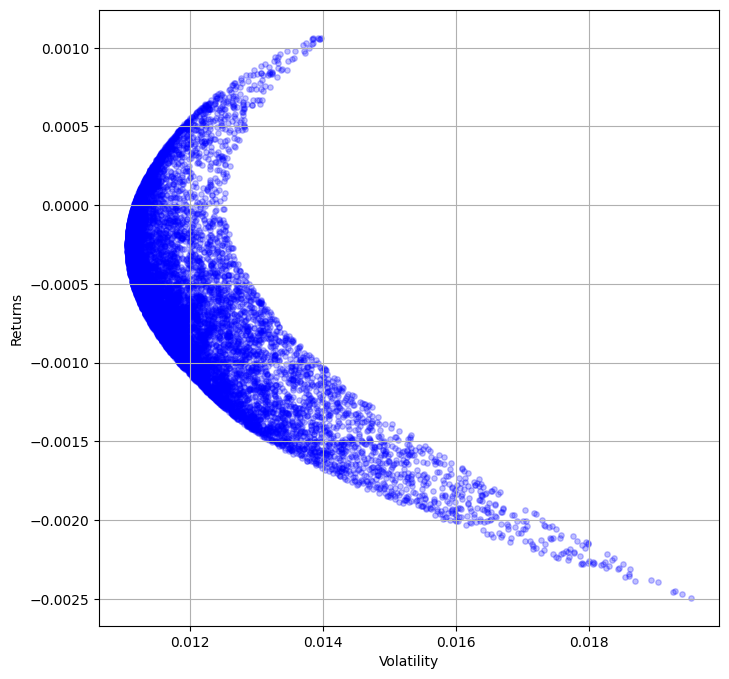

In [ ]:
# Plotting return VS risk to get effecient frontier.
df_portfolio_data.plot.scatter(x = "Risk", y = "Returns", marker ='o', color = 'b', s = 15, alpha = 0.25, grid = True, figsize = [8, 8])
plt.xlabel("Volatility")
plt.ylabel("Returns")

In [ ]:
# Finding mainimum variance Portfolio.
min_vol = df_portfolio_data.iloc[df_portfolio_data["Risk"].idxmin()]
min_vol

Returns       -0.000262
Risk           0.011059
GE weight      0.173959
IBM weight     0.460605
MSFT weight    0.365436
Name: 8960, dtype: float64

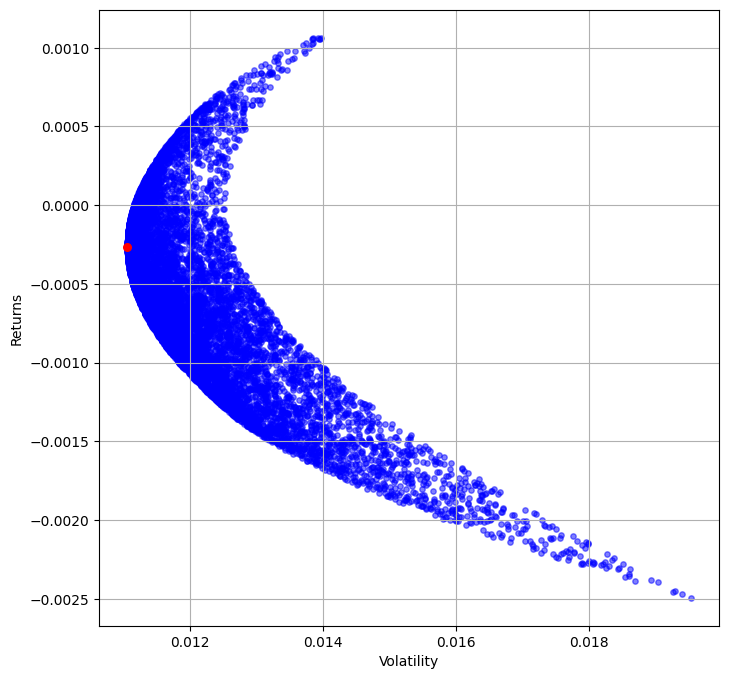

In [ ]:
df_portfolio_data.plot.scatter(x = "Risk", y = "Returns", marker ='o', color = 'b', s = 15, alpha = 0.5, grid = True, figsize = [8, 8])
plt.xlabel("Volatility")
plt.ylabel("Returns")
plt.scatter(min_vol[1], min_vol[0], color = 'r', marker = 'o', s = 30)

**THE FAMA FRENCH 3 FACTOR MODEL**

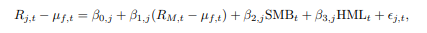



The First factor (RM,t − μf,t) is the excess return of the market portfolio,

The second risk factor, which is called small minus big (SMB), is the difference in returns on a portfolio of small stocks and a portfolio of large stocks.

The third factor, HML (high minus low), is the difference in returns on a portfolio of high book-to-market value (BE/ME) stocks and a portfolio of low BE/ME stocks.

In [ ]:
# Getting all the parameters ready for Factor modelling.
print(Data_set.head())
Data_set["GE"] = Data_set["GE"] - Data_set["RF"]
Data_set["IBM"] = Data_set["IBM"] - Data_set["RF"]
Data_set["MSFT"] = Data_set["MSFT"] - Data_set["RF"]
Data_set.rename(columns = {'Mkt-RF':'ExcessMkt'}, inplace = True)
print(Data_set.head())

                  GE       IBM      MSFT  Mkt-RF   SMB   HML     RF
Date                                                               
2017-01-04  0.000316  0.012381 -0.004475    0.79  0.95 -0.16  0.002
2017-01-05 -0.005678 -0.003309  0.000000   -0.21 -0.89 -0.79  0.002
2017-01-06  0.002855  0.004920  0.008668    0.29 -0.66 -0.31  0.002
2017-01-09 -0.004745 -0.011089 -0.003183   -0.37 -0.30 -1.03  0.002
2017-01-10 -0.002861 -0.012705 -0.000319    0.16  0.89  0.43  0.002
                  GE       IBM      MSFT  ExcessMkt   SMB   HML     RF
Date                                                                  
2017-01-04 -0.001684  0.010381 -0.006475       0.79  0.95 -0.16  0.002
2017-01-05 -0.007678 -0.005309 -0.002000      -0.21 -0.89 -0.79  0.002
2017-01-06  0.000855  0.002920  0.006668       0.29 -0.66 -0.31  0.002
2017-01-09 -0.006745 -0.013089 -0.005183      -0.37 -0.30 -1.03  0.002
2017-01-10 -0.004861 -0.014705 -0.002319       0.16  0.89  0.43  0.002


image.png

To Estimate the Covariance matrix of returns we find out beta matrix(Matrix of loading), Covariance matrix of factors and Covariance matrix of the regression residuals

In [ ]:
# Regressing GE Returns over the Fama French 3 factor model.
import statsmodels.api as sm
X = Data_set[['ExcessMkt', 'SMB', 'HML']]
y = Data_set['GE']
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est1 = sm.OLS(y, X).fit()
(est1.summary())
print(est1.params)
print(est1.resid)

const       -0.007746
ExcessMkt    0.008872
SMB         -0.002008
HML          0.005764
dtype: float64
Date
2017-01-04    0.001883
2017-01-05    0.004697
2017-01-06    0.006490
2017-01-09    0.009618
2017-01-10    0.000774
                ...   
2018-12-24   -0.008023
2018-12-26    0.025530
2018-12-27   -0.027046
2018-12-28    0.030072
2018-12-31   -0.000799
Length: 501, dtype: float64


In [ ]:
# Regressing IBM Returns over the Fama French 3 factor model.
X = Data_set[['ExcessMkt', 'SMB', 'HML']]
y = Data_set['IBM']
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est2 = sm.OLS(y, X).fit()
est2.summary()
print(est2.params)
print(est2.resid)

const       -0.005956
ExcessMkt    0.009330
SMB         -0.002709
HML          0.001109
dtype: float64
Date
2017-01-04    0.011718
2017-01-05    0.001073
2017-01-06    0.004727
2017-01-09   -0.003351
2017-01-10   -0.008308
                ...   
2018-12-24   -0.008389
2018-12-26   -0.015771
2018-12-27    0.007481
2018-12-28   -0.009558
2018-12-31   -0.007539
Length: 501, dtype: float64


In [ ]:
# Regressing MSFT Returns over the Fama French 3 factor model.
X = Data_set[['ExcessMkt', 'SMB', 'HML']]
y = Data_set['MSFT']
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est3 = sm.OLS(y, X).fit()
est3.summary()
print(est3.params)
print(est3.resid)

const       -0.004737
ExcessMkt    0.013401
SMB         -0.003180
HML         -0.006490
dtype: float64
Date
2017-01-04   -0.010342
2017-01-05   -0.002406
2017-01-06    0.003408
2017-01-09   -0.003126
2017-01-10    0.005894
                ...   
2018-12-24   -0.013764
2018-12-26   -0.012574
2018-12-27   -0.013428
2018-12-28   -0.009533
2018-12-31   -0.009874
Length: 501, dtype: float64


In [ ]:
# Finding the Beta Matrix.
Dict = {"GE": est1.params[1:], "IBM":est2.params[1:], "MSFT":est3.params[1:]}
Beta_Matrix = pd.concat(Dict, axis = 1)
Beta_Matrix

,GE,IBM,MSFT
ExcessMkt,0.008872,0.009330,0.013401
SMB,-0.002008,-0.002709,-0.003180
HML,0.005764,0.001109,-0.006490


In [ ]:
# Mean and covariance matrix for Factors
cov_matrix_FF = Data_set[['ExcessMkt', 'SMB', 'HML']].cov()
print(cov_matrix_FF)
mean_vector_FF = Data_set[['ExcessMkt', 'SMB', 'HML']].mean()
print(mean_vector_FF)

           ExcessMkt       SMB       HML
ExcessMkt   0.698815  0.042280 -0.092061
SMB         0.042280  0.254108 -0.028137
HML        -0.092061 -0.028137  0.295366
ExcessMkt    0.026667
SMB         -0.013852
HML         -0.043792
dtype: float64


In [ ]:
# Estimating covariance matrix using factor modelling.
cov_returns_FF = (np.transpose(Beta_Matrix)@ cov_matrix_FF @Beta_Matrix)
# print(cov_returns_FF)

## Covariance matrix of residuals.
dict_resid = {"est1": est1.resid, "est2" : est2.resid, "est3" : est3.resid}
residuals = pd.concat(dict_resid, axis = 1)
cov_error = residuals.cov()
# print(cov_error)

cov_returns_FF = pd.DataFrame(cov_returns_FF.to_numpy() + cov_error.to_numpy())
print(cov_returns_FF)

          0         1         2
0  0.000398  0.000084  0.000063
1  0.000084  0.000177  0.000093
2  0.000063  0.000093  0.000210


In [ ]:
# Estimating Mean vector using factor modelling.
mean_FF = np.transpose(Beta_Matrix) @ mean_vector_FF
# print(mean_FF)

mean_FF[0] = mean_FF[0] + est1.params[0]
mean_FF[1] = mean_FF[1] + est2.params[0]
mean_FF[2] = mean_FF[2] + est3.params[0]
print(mean_FF)

GE     -0.007734
IBM    -0.005719
MSFT   -0.004051
dtype: float64


In [ ]:
# Creating a data structures for simulation.
list_returns = []
list_SD = []
list_weights = []
no_of_Portfolio = 10000
no_of_asset = len(Portfolio_returns.columns)

In [ ]:
# Portfolio Simulation but this time with Fama frech model estimates.
for porfolio in range(no_of_Portfolio):
    weights = np.random.random(no_of_asset)

    weights = weights/sum(weights)
    list_weights.append(weights)

    returns = np.dot(weights, mean_FF)
    list_returns.append(returns)

    var = np.transpose(weights) @ cov_returns_FF @ weights
    sd = np.sqrt(var)
    list_SD.append(sd)

In [ ]:
# Data from the simulation.
portfolio_data = { "Returns" : list_returns, "Risk" : list_SD}

for counter, symbol in enumerate(Portfolio.columns.tolist()):
  portfolio_data[symbol + ' weight'] = [w[counter] for w in list_weights]


df_portfolio_data = pd.DataFrame(portfolio_data)
df_portfolio_data.head()

,Returns,Risk,GE weight,IBM weight,MSFT weight
0,-0.007138,0.016642,0.785151,0.116804,0.098045
1,-0.006498,0.013140,0.485117,0.396186,0.118697
2,-0.005095,0.011740,0.155491,0.282761,0.561748
3,-0.005320,0.011459,0.162389,0.402428,0.435183
4,-0.005631,0.011483,0.186538,0.535342,0.278121


Text(0, 0.5, 'Returns')

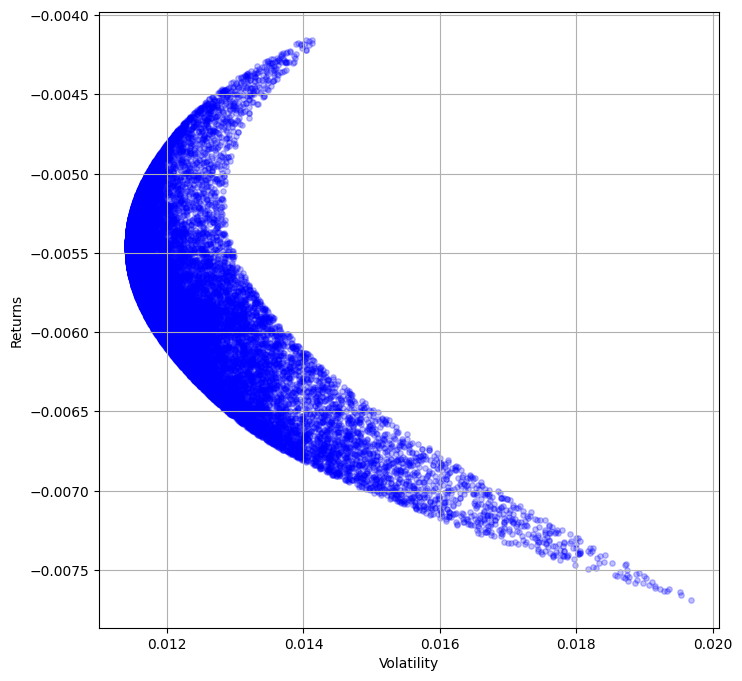

In [ ]:
# Plotting return VS risk to get the effecient Frontier.
df_portfolio_data.plot.scatter(x = "Risk", y = "Returns", marker ='o', color = 'b', s = 15, alpha = 0.25, grid = True, figsize = [8, 8])
plt.xlabel("Volatility")
plt.ylabel("Returns")

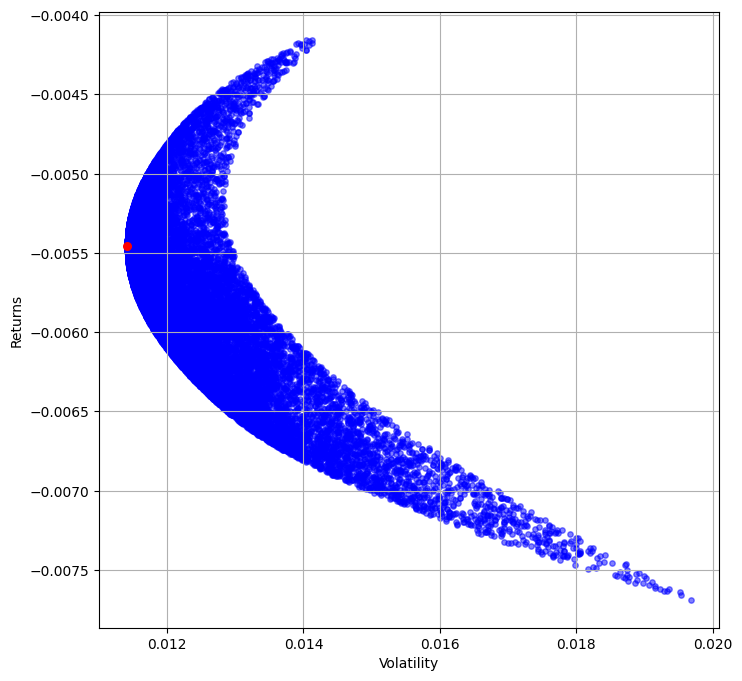

In [ ]:
# Finding Minimumm variance portfolio.
min_vol = df_portfolio_data.iloc[df_portfolio_data["Risk"].idxmin()]
min_vol

df_portfolio_data.plot.scatter(x = "Risk", y = "Returns", marker ='o', color = 'b', s = 15, alpha = 0.5, grid = True, figsize = [8, 8])
plt.xlabel("Volatility")
plt.ylabel("Returns")
plt.scatter(min_vol[1], min_vol[0], color = 'r', marker = 'o', s = 30)